<a href="https://colab.research.google.com/github/gouthamkallempudi/googletechdevguide/blob/master/Lesson10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import keras
keras.__version__

'2.2.4'

In [41]:
from keras.datasets import imdb
(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words = 10000)
print(train_data.shape)

(25000,)


In [42]:
len(train_data[3])

550

In [43]:
max([len(sequence) for sequence in train_data])

2494

In [44]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
import numpy as np

def vectorize_sequences(sequences , dimensions = 10000):
  results = np.zeros((len(sequences) , dimensions))
  for i , sequence in enumerate(sequences):
    results[i , sequence] = 1
  return results  
    
    
x_train = vectorize_sequences(train_data)    
x_test = vectorize_sequences(test_data)    

In [46]:
print(x_train[0].shape)
print(x_train[1].shape)
print(x_train.shape)
x_train.dtype

(10000,)
(10000,)
(25000, 10000)


dtype('float64')

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [48]:
y_train.shape

(25000,)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))

In [0]:
model.compile(optimizer = "rmsprop" , loss = "binary_crossentropy" , metrics = ["accuracy"])

In [0]:
from keras.optimizers import RMSprop
from keras.losses import binary_crossentropy
from keras.metrics import binary_accuracy

model.compile(optimizer = RMSprop(lr = 0.01) , loss = binary_crossentropy , metrics = [binary_accuracy])

In [0]:
# validation set
x_val = x_train[:10000]
partial_train_x = x_train[10000 : ]

y_val = y_train[:10000]
partial_train_y = y_train[10000 : ]

In [53]:
history = model.fit(partial_train_x , partial_train_y , epochs = 20 , batch_size = 512 , validation_data = (x_val , y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.6634 - binary_accuracy: 0.6474 - val_loss: 0.3594 - val_binary_accuracy: 0.8664
Epoch 2/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.3124 - binary_accuracy: 0.8770 - val_loss: 0.2779 - val_binary_accuracy: 0.8912
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2615 - binary_accuracy: 0.8914 - val_loss: 0.4428 - val_binary_accuracy: 0.8273
Epoch 4/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2333 - binary_accuracy: 0.9089 - val_loss: 0.3661 - val_binary_accuracy: 0.8619
Epoch 5/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1426 - binary_accuracy: 0.9456 - val_loss: 0.3940 - val_binary_accuracy: 0.8742
Epoch 6/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1614 - binary_accuracy: 0.9465 - val_loss: 0.4578 - val_bi

In [56]:
history_dict  = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

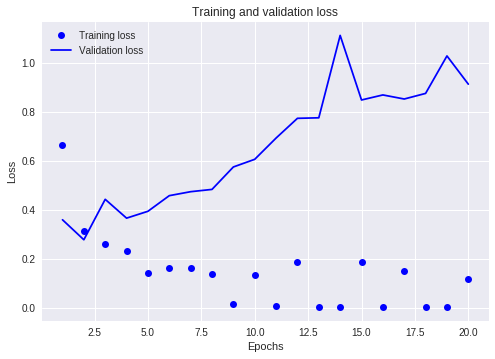

In [57]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [60]:
#Let's train a new network from scratch for four epochs, then evaluate it on our test data:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 196us/step - loss: 0.4735 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 3s 116us/step - loss: 0.2672 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 3s 116us/step - loss: 0.2030 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step


In [62]:
results

[0.31102097086906433, 0.8764]

In [63]:
model.predict(x_test)

array([[0.16045794],
       [0.999851  ],
       [0.41905996],
       ...,
       [0.0818826 ],
       [0.05005472],
       [0.46292472]], dtype=float32)

In [0]:
# Further experiments
# We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
# Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
# Try to use the mse loss function instead of binary_crossentropy.
# Try to use the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.